In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# read in data
retail_df = pd.read_csv('../original_retail_datasets/features_dataset.csv', parse_dates=['Date'], dayfirst=True)
retail_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
# check columns
retail_df.columns.tolist()

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday']

In [4]:
# drop markdown columns
retail_df = retail_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [5]:
# check columns again
retail_df.columns.tolist()

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'IsHoliday']

In [6]:
# total number of rows
print(f'There are a total of',len(retail_df),'rows.')

There are a total of 8190 rows.


In [7]:
# data types of columns
retail_df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [8]:
# change date column to MM/DD/YYYY
retail_df["Date"] = pd.to_datetime(retail_df["Date"]).dt.strftime('%m/%d/%Y')
retail_df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,02/05/2010,42.31,2.572,211.096358,8.106,False
1,1,02/12/2010,38.51,2.548,211.242170,8.106,True
2,1,02/19/2010,39.93,2.514,211.289143,8.106,False
3,1,02/26/2010,46.63,2.561,211.319643,8.106,False
4,1,03/05/2010,46.50,2.625,211.350143,8.106,False


In [9]:
# new dataframe with no null values
retail_df2 = retail_df.dropna()
retail_df2.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,02/05/2010,42.31,2.572,211.096358,8.106,False
1,1,02/12/2010,38.51,2.548,211.242170,8.106,True
2,1,02/19/2010,39.93,2.514,211.289143,8.106,False
3,1,02/26/2010,46.63,2.561,211.319643,8.106,False
4,1,03/05/2010,46.50,2.625,211.350143,8.106,False


In [10]:
# number of rows with no null values
print(f'There are',len(retail_df2), 'rows without null values.')

There are 7605 rows without null values.


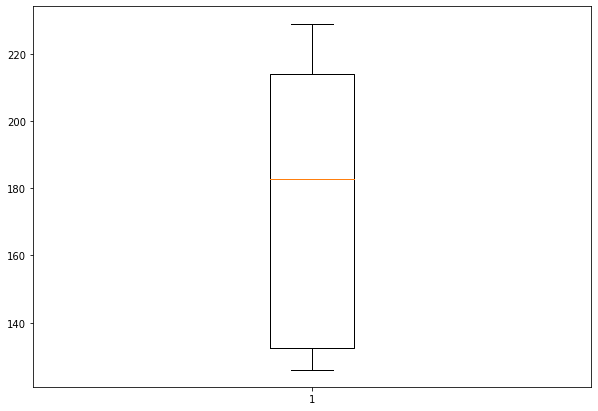

In [11]:
# plot of CPI using dataframe with no null values
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(retail_df2['CPI'])
# show plot
plt.show()

In [12]:
# export cleaned csv file
retail_df2.to_csv('../cleaned_datasets/features_data_clean.csv', index=False)